# Import necessary libraries

In [29]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import joblib

# Suppress warnings to avoid clutter

In [30]:
import warnings
warnings.filterwarnings("ignore")


# Load the Iris dataset

In [31]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Display the first few rows of the dataset

In [32]:
# Display the first few rows
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


# Check for missing values in the dataset

In [33]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


# Check for duplicate rows in the dataset

In [34]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

if duplicates > 0:
    print("\nDuplicate Rows:")
    print(df[df.duplicated()])


Number of Duplicate Rows: 1

Duplicate Rows:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     species  
142        2  


# Drop duplicate rows from the dataset

In [35]:
# Drop duplicates
df = df.drop_duplicates()
print("\nDuplicates removed. Dataset now has", len(df), "rows.")



Duplicates removed. Dataset now has 149 rows.


# Display summary statistics and general information about the dataset

In [36]:
# Summary statistics and dataset information
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        149.000000  149.000000  
mean           1.194631    0.993289  
std            0.762622    0.817847  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


# Check the distribution of target classes (species)

In [37]:
# Check the distribution of target classes
class_counts = df['species'].value_counts()
print("\nClass Distribution:")
print(class_counts)


Class Distribution:
species
0    50
1    50
2    49
Name: count, dtype: int64


# Visualize the class distribution

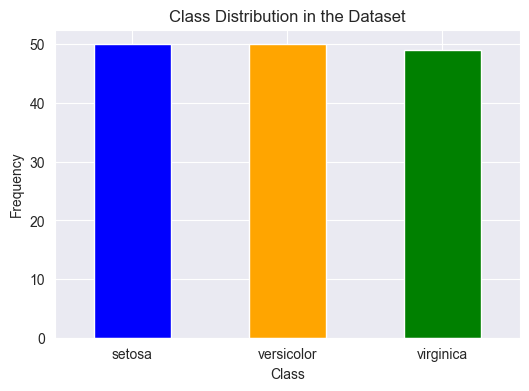

In [38]:
# Visualize the class distribution

plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Class Distribution in the Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=range(len(class_counts)), labels=iris.target_names, rotation=0)
plt.show()

# Visualize various features using boxplots

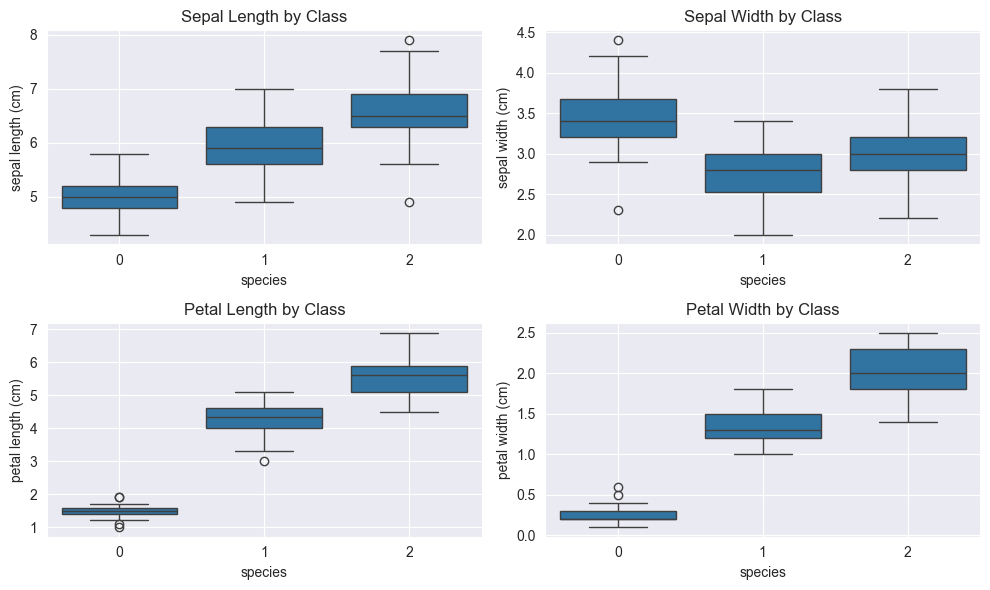

In [39]:
# Set the figure size for the subplots
plt.figure(figsize=(10, 6))

# Boxplot for Sepal Length by Species
plt.subplot(2, 2, 1)  # First subplot (2 rows, 2 columns, 1st plot)
sns.boxplot(x='species', y='sepal length (cm)', data=df)  # Boxplot for sepal length grouped by species
plt.title('Sepal Length by Class')  # Title of the plot
plt.grid(True)  # Adding gridlines for better readability

# Boxplot for Sepal Width by Species
plt.subplot(2, 2, 2)  # Second subplot (2 rows, 2 columns, 2nd plot)
sns.boxplot(x='species', y='sepal width (cm)', data=df)  # Boxplot for sepal width grouped by species
plt.title('Sepal Width by Class')  # Title of the plot
plt.grid(True)  # Adding gridlines for better readability

# Boxplot for Petal Length by Species
plt.subplot(2, 2, 3)  # Third subplot (2 rows, 2 columns, 3rd plot)
sns.boxplot(x='species', y='petal length (cm)', data=df)  # Boxplot for petal length grouped by species
plt.title('Petal Length by Class')  # Title of the plot
plt.grid(True)  # Adding gridlines for better readability

# Boxplot for Petal Width by Species
plt.subplot(2, 2, 4)  # Fourth subplot (2 rows, 2 columns, 4th plot)
sns.boxplot(x='species', y='petal width (cm)', data=df)  # Boxplot for petal width grouped by species
plt.title('Petal Width by Class')  # Title of the plot
plt.grid(True)  # Adding gridlines for better readability

# Adjust the layout to prevent overlap between subplots
plt.tight_layout()

# Display the plots
plt.show()


# Visualize feature distributions using histograms with KDE

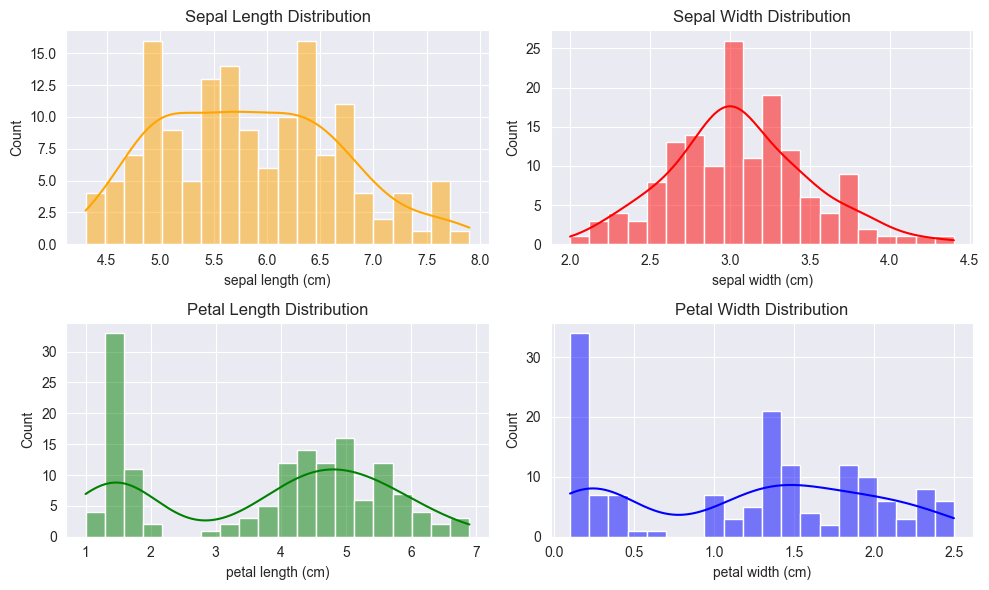

In [40]:
# Set the figure size for the subplots
plt.figure(figsize=(10, 6))

# Histogram for Sepal Length with KDE
plt.subplot(2, 2, 1)  # First subplot (2 rows, 2 columns, 1st plot)
sns.histplot(df['sepal length (cm)'], kde=True, bins=20, color='orange')  # Histogram with KDE
plt.title('Sepal Length Distribution')  # Title for the plot

# Histogram for Sepal Width with KDE
plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], kde=True, bins=20, color='red')
plt.title('Sepal Width Distribution')

# Histogram for Petal Length with KDE
plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], kde=True, bins=20, color='green')
plt.title('Petal Length Distribution')  # Title for the plot

# Histogram for Petal Width with KDE
plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], kde=True, bins=20, color='blue')
plt.title('Petal Width Distribution')  # Title for the plot

# Adjust layout to avoid overlap between subplots
plt.tight_layout()

# Display the plots
plt.show()


# Pairplot to visualize relationships between features by species

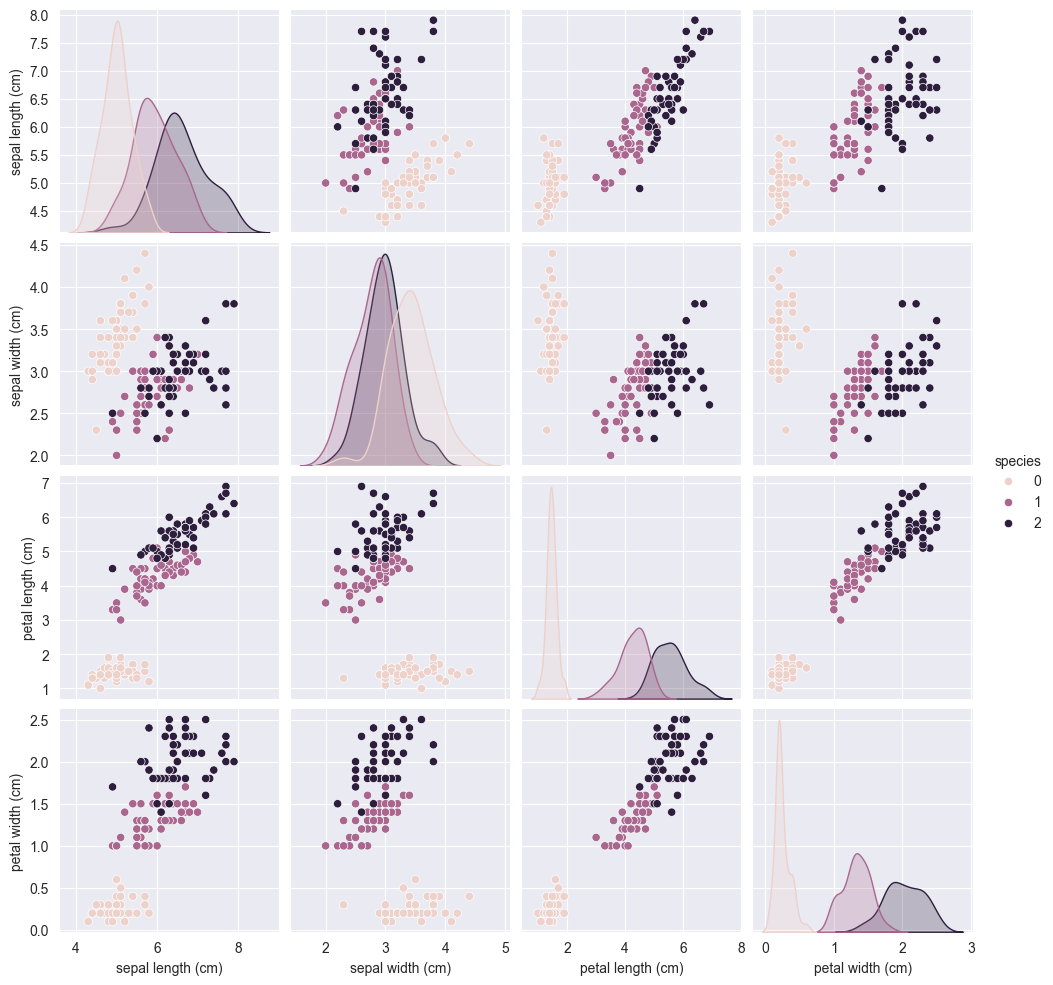

In [41]:
sns.pairplot(df, hue='species', diag_kind='kde')
plt.show()

# Compute and visualize the correlation matrix

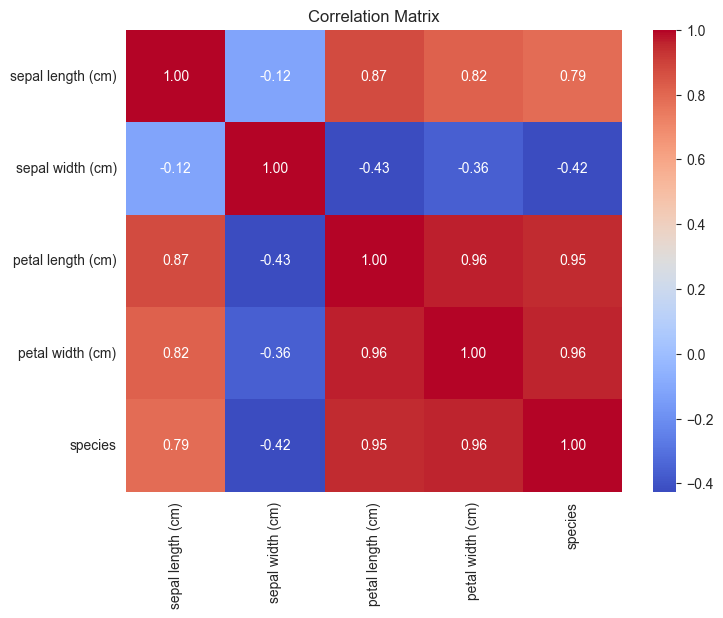

In [42]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


# Split the data into features (X) and target (y)

In [43]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['species'])  # Features (drop target column)
y = df['species']  # Target column

# Split the data into training and testing sets (80% train, 20% test)

In [44]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models for comparison

In [45]:
# Initialize models
rf_model = RandomForestClassifier()
svm_model = SVC()
lr_model = LogisticRegression()
gb_model = GradientBoostingClassifier()  # Gradient Boosting model

# List of models
models = [rf_model, svm_model, lr_model, gb_model]  # Added GradientBoostingClassifier

# Evaluate on both training and test sets
print("Training and Test Set Performance:")
for model in models:
    model.fit(x_train, y_train)
    train_accuracy = model.score(x_train, y_train)  # Training set accuracy
    test_accuracy = model.score(x_test, y_test)    # Test set accuracy
    print(f"{model.__class__.__name__}:")
    print(f"  Training Accuracy: {train_accuracy:.2f}")
    print(f"  Test Accuracy: {test_accuracy:.2f}")


Training and Test Set Performance:
RandomForestClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 1.00
SVC:
  Training Accuracy: 0.97
  Test Accuracy: 1.00
LogisticRegression:
  Training Accuracy: 0.97
  Test Accuracy: 1.00
GradientBoostingClassifier:
  Training Accuracy: 1.00
  Test Accuracy: 1.00


# Cross-validation to estimate model performance

In [46]:
# Define the models you want to evaluate
rf_model = RandomForestClassifier()
gb_model = GradientBoostingClassifier()

# List of models to evaluate
models = [rf_model, gb_model]

# Perform cross-validation for each model on the same dataset
for model in models:
    # Use cross-validation to estimate the performance
    cross_val_scores = cross_val_score(model, X, y, cv=5)  # X and y are the same dataset
    print(f"Cross-validation scores for {model.__class__.__name__}: {cross_val_scores}")
    print(f"Mean Cross-validation Accuracy: {cross_val_scores.mean():.2f}")


Cross-validation scores for RandomForestClassifier: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
Mean Cross-validation Accuracy: 0.96
Cross-validation scores for GradientBoostingClassifier: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
Mean Cross-validation Accuracy: 0.96


# Feature scaling using StandardScaler

In [47]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data to scale the features
x_train_scaled = scaler.fit_transform(x_train)

In [48]:
# Transform the test data using the same scaler (using only transform here)
x_test_scaled = scaler.transform(x_test)


## Initializing and Training the RandomForest Model

In [49]:
# Initialize the RandomForestClassifier model
rf_model = RandomForestClassifier()

# Train the RandomForest model on the scaled training data
rf_model.fit(x_train_scaled, y_train)


RandomForestClassifier()

## Model Evaluation

In [50]:
# Evaluate the model on the scaled training and test sets
train_accuracy = rf_model.score(x_train_scaled, y_train)
test_accuracy = rf_model.score(x_test_scaled, y_test)

# Print the model performance
print(f"RandomForestClassifier Performance:")
print(f"  Training Accuracy: {train_accuracy:.2f}")
print(f"  Test Accuracy: {test_accuracy:.2f}")


RandomForestClassifier Performance:
  Training Accuracy: 1.00
  Test Accuracy: 1.00


# Display feature importance from the RandomForest model

In [51]:
# Get feature importance from the trained RandomForest model
importances = rf_model.feature_importances_

# Create a DataFrame to display the feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("\nFeature Importance:")
print(feature_importance_df)



Feature Importance:
             Feature  Importance
2  petal length (cm)    0.475191
3   petal width (cm)    0.393190
0  sepal length (cm)    0.098947
1   sepal width (cm)    0.032673


# Hyperparameter tuning using GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best Cross-validation Score: {grid_search.best_score_:.2f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Parameters from GridSearchCV:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.96


# Evaluate the model with confusion matrix and classification report

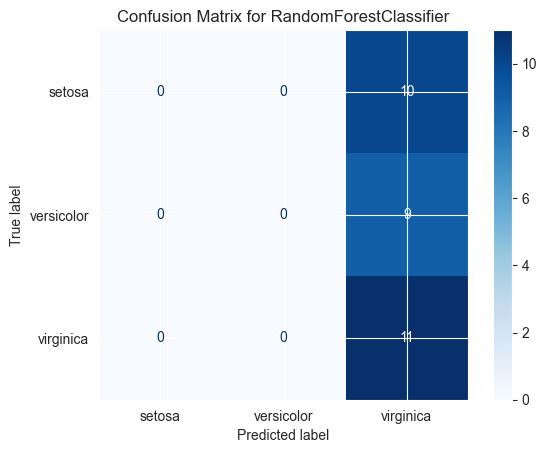

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate predictions on the test set
y_pred = rf_model.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for RandomForestClassifier")
plt.show()


In [54]:
from sklearn.metrics import classification_report

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



# Save the trained RandomForest model to a file

In [55]:
# Save the trained RandomForest model to a file
joblib.dump(rf_model, 'random_forest_model.joblib')

print("Model saved successfully as 'random_forest_model.joblib'.")

Model saved successfully as 'random_forest_model.joblib'.


# Load the saved model and make predictions

In [56]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.joblib')

# Use the loaded model to make predictions or evaluate it
y_pred_loaded = loaded_model.predict(x_test)
print("Predictions with loaded model:", y_pred_loaded)

Predictions with loaded model: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
